In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,TID,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,surcharge,fare_amount
0,AIX000345001,DST000401,NO,0.0,1.4,0.5,2015-04-20 04:18:25,2015-04-20 04:24:20,1,-74.003939,40.742894,1,N,-73.993369,40.734247,CRD,0.5,8.4
1,AIX000345002,DST000401,NO,0.0,1.0,0.5,2015-04-19 18:16:07,2015-04-19 18:22:06,3,-73.973864,40.752194,1,N,-73.958701,40.772533,CRD,0.0,8.5
2,AIX000345003,DST000401,NO,0.0,0.0,0.5,2015-04-06 08:04:32,2015-04-06 08:10:05,2,-73.954406,40.764420,1,N,-73.970780,40.758350,CSH,0.0,7.0
3,AIX000345004,DST000532,NO,0.0,1.8,0.5,2015-04-10 09:48:00,2015-04-10 10:00:00,2,-73.962345,40.767215,1,NaN,-73.975512,40.756867,CRD,0.0,11.3
4,AIX000345005,DST000401,NO,0.0,0.0,0.5,2015-04-15 13:12:48,2015-04-15 13:26:30,1,-74.004657,40.707434,1,N,-73.999369,40.721517,CSH,0.0,10.0


In [38]:
train.isnull().any()

TID                   False
vendor_id             False
new_user               True
tolls_amount          False
tip_amount             True
mta_tax               False
pickup_datetime       False
dropoff_datetime      False
passenger_count       False
pickup_longitude       True
pickup_latitude        True
rate_code             False
store_and_fwd_flag     True
dropoff_longitude      True
dropoff_latitude       True
payment_type          False
surcharge              True
fare_amount           False
dtype: bool

In [41]:
len(train[train.new_user.isnull()])

19

In [42]:
len(train[train.tip_amount.isnull()])

165196

In [44]:
len(train[train.store_and_fwd_flag.isnull()])

648122

In [45]:
len(train[train.surcharge.isnull()])

99173

In [4]:
train.vendor_id.value_counts()

DST000532    648113
DST000401    494087
DST000543    268691
DST000481    247208
Name: vendor_id, dtype: int64

In [5]:
train.new_user.value_counts()

NO     1657917
YES        163
Name: new_user, dtype: int64

In [12]:
df_ = pd.DataFrame()

In [15]:
df_.pickup_datetime = pd.to_datetime(train.pickup_datetime)
df_['month'] = df_.pickup_datetime.dt.month
df_['weekday'] = df_.pickup_datetime.dt.weekday
df_['hour'] = df_.pickup_datetime.dt.hour

In [26]:
train.passenger_count.value_counts()

1    1157281
2     231883
5      99002
3      69928
6      65726
4      33956
0        315
7          5
9          2
8          1
Name: passenger_count, dtype: int64

In [30]:
train.rate_code.value_counts()

1      1618770
2        31211
5         4842
3         2623
4          568
0           49
6           18
99          16
210          2
Name: rate_code, dtype: int64

In [31]:
train.store_and_fwd_flag.value_counts()

N    993926
Y     16051
Name: store_and_fwd_flag, dtype: int64

In [32]:
train.payment_type.value_counts()

CRD    986400
CSH    660148
UNK      5953
NOC      4311
DIS      1287
Name: payment_type, dtype: int64

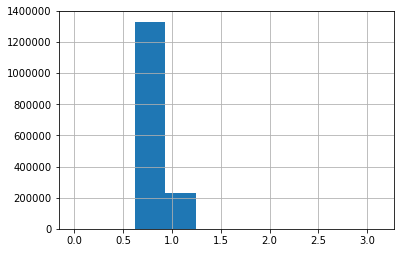

In [31]:
np.log(train.surcharge+2).hist()

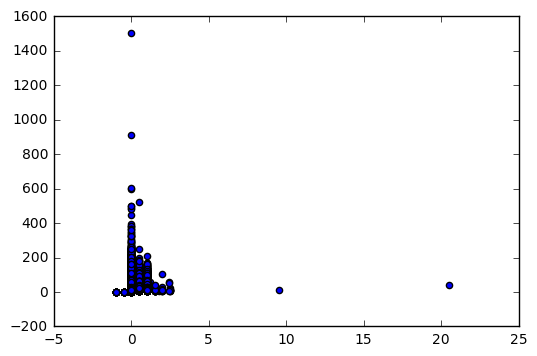

In [34]:
plt.scatter(x=train['surcharge'], y=train['fare_amount'])

In [10]:
np.log(train['mta_tax']+2).value_counts()

0.916291    1651776
0.693147       6166
0.405465        157
Name: mta_tax, dtype: int64

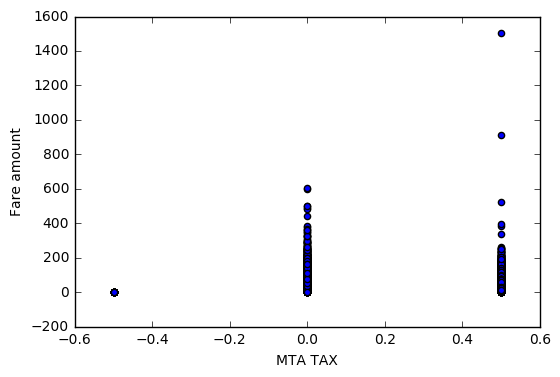

In [48]:
plt.scatter(x=train['mta_tax'], y=train['fare_amount'])
plt.xlabel('MTA TAX')
plt.ylabel('Fare amount')

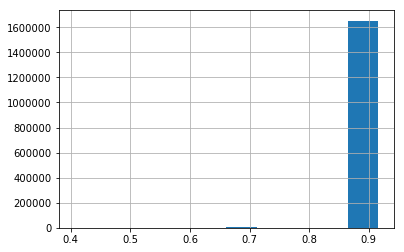

In [27]:
(np.log(train.mta_tax+2)).hist()

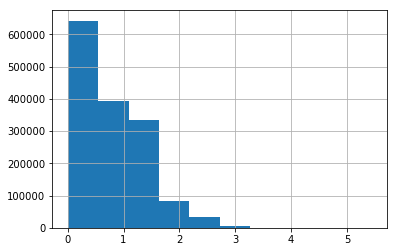

In [19]:
np.log(train['tip_amount']+1).hist()

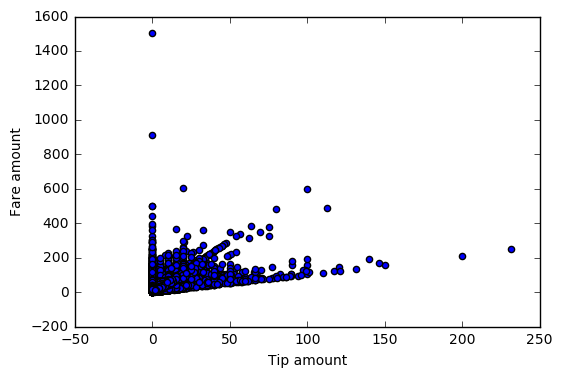

In [47]:
plt.scatter(x=train['tip_amount'], y=train['fare_amount'])
plt.xlabel('Tip amount')
plt.ylabel('Fare amount')

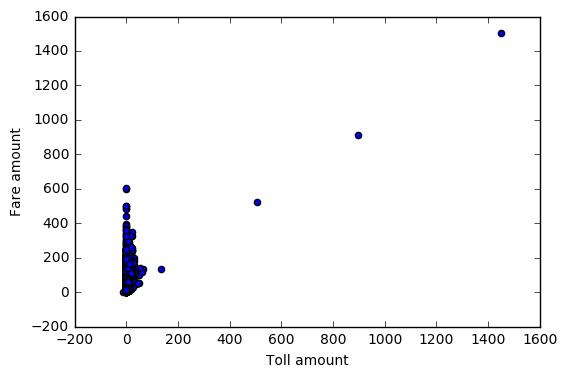

In [46]:
plt.scatter(x=train['tolls_amount'], y=train['fare_amount'])
plt.xlabel('Toll amount')
plt.ylabel('Fare amount')

C:\ProgramData\Anaconda2.1\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


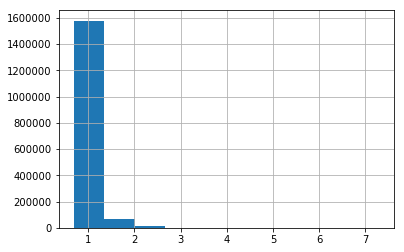

In [35]:
np.log(train.tolls_amount+2).hist()